<h1>Unsupervised Learning Chapter 2: density based spatial clustering of applications with noise (DBSCAN)  </h1>

<h2>Refrance:</h2>

https://towardsdatascience.com/dbscan-clustering-for-data-shapes-k-means-cant-handle-well-in-python-6be89af4e6ea
<br><b>Book:</b><br>

http://shop.oreilly.com/product/0636920030515.do

In [6]:
import mglearn
%matplotlib inline

In [3]:
#!pip install --upgrade mglearn

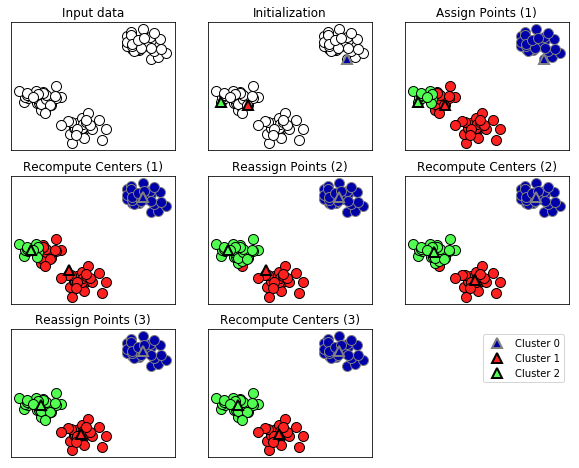

In [7]:
mglearn.plots.plot_kmeans_algorithm()

One issue with k-means clustering is that it assumes that all directions are equally important for each cluster. This is usually not a big problem, unless we come across with some oddly shape data.


In this example, we will artificially generate that type of data. With the code below, provided by the authors of the book (with some minor changes in number of clusters), we can generate some data that k-means won’t be able to handle correctly:

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

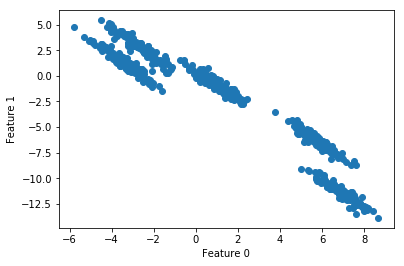

In [9]:
# generate some random cluster data
X, y = make_blobs(random_state=170, n_samples=600, centers = 5)
rng = np.random.RandomState(74)
# transform the data to be stretched
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)
# plot
plt.scatter(X[:, 0], X[:, 1])
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

As you can see, we have arguably 5 defined clusters with a stretched diagonal shape.<br>
Let’s apply k-means clustering:

Text(0,0.5,'Feature 1')

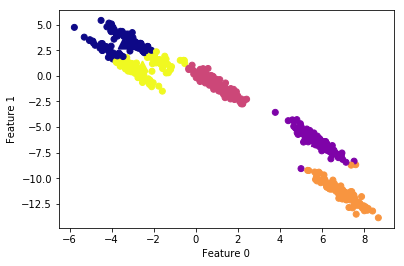

In [10]:
# cluster the data into five clusters
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
y_pred = kmeans.predict(X)
# plot the cluster assignments and cluster centers
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="plasma")
plt.scatter(kmeans.cluster_centers_[:, 0],   
            kmeans.cluster_centers_[:, 1],
            marker='^', 
            c=[0, 1, 2, 3, 4], 
            s=100, 
            linewidth=2,
            cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

What we can see here is that k-means has been able to correctly detect the clusters at the middle and bottom, <br>
 As k-means only considers the distance to the nearest cluster center, it can’t handle this kind of data.<br>
 Let’s see how <b>DBSCAN clustering</b> can help with this shape:<br>

<h3>DBSCAN</h3>

Some highlights about DBSCAN clustering extracted from the book:<br>

- stands for “density based spatial clustering of applications with noise”.
- does not require the user to set the number of clusters a priori.
- can capture clusters of complex shapes.
- can identify points that are not part of any cluster (very useful as outliers detector).
- is somewhat slower than agglomerative clustering and k-means, but still scales to relatively large datasets.
- works by identifying points that are in crowded regions of the feature space, where many data points are close together (dense regions in feature space)
- Points that are within a dense region are called core samples (or core points)
- There are two parameters in DBSCAN: min_samples and eps.
- If there are at least min_samples many data points within a distance of eps to a given data point, that data point is classified as a core sample.
- core samples that are closer to each other than the distance eps are put into the same cluster by DBSCAN.




This is an example of how clustering changes according to the choosing of both parameters:

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


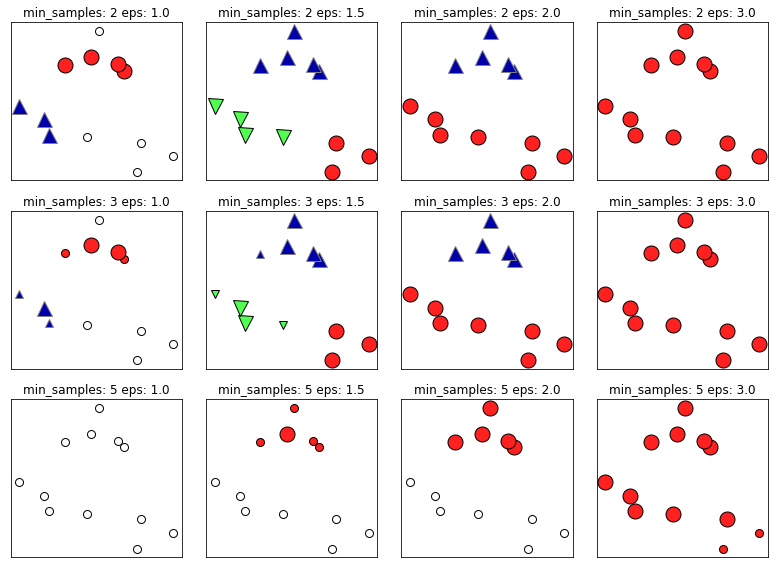

In [12]:
mglearn.plots.plot_dbscan()

- The parameter eps is somewhat more important, as it determines what it means for points to be close.etting eps to be very small will mean that no points are core samples, and may lead to all points being labeled as noise. Setting eps to be very large will result in all points forming a single cluster.<br>
Let’s get back to our example and see how DBSCAN deals with it:

In [13]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

Text(0,0.5,'Feature 1')

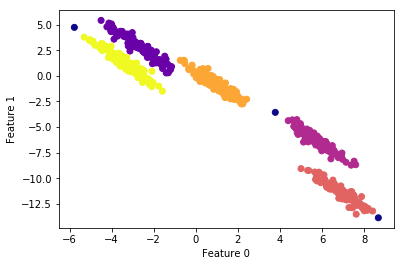

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# cluster the data into five clusters
dbscan = DBSCAN(eps=0.123, min_samples = 2)
clusters = dbscan.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- While DBSCAN doesn’t require setting the number of clusters explicitly, setting eps implicitly controls how many clusters will be found.
- Finding a good setting for eps is sometimes easier after scaling the data, as using these scaling techniques will ensure that all features have similar ranges.


Lastly, considering we created the data points explicitly defining 5 clusters, we can mesure performance using adjusted_rand_score. This is not frequent since in real cases we don’t have cluster labels to begin with (thus our need to apply clustering techinques). Since in this case we do have labels, we can measure performance:

In [16]:
from sklearn.metrics.cluster import adjusted_rand_score
#k-means performance:
print("ARI =", adjusted_rand_score(y, y_pred).round(2))

#DBSCAN performance:
print("ARI =", adjusted_rand_score(y, clusters).round(2))


ARI = 0.76
ARI = 0.99
